In [1]:
# source: https://www.kaggle.com/datasets/camnugent/sandp500
!wget -nc https://lazyprogrammer.me/course_files/all_stocks_5yr.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"C:\Users\Emilie Berger\Downloads\all_stocks_5yr.csv", parse_dates=True)

In [4]:
sbux = data[data['Name'] == 'SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


<AxesSubplot:>

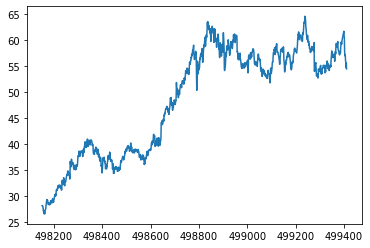

In [5]:
sbux['close'].plot()

In [6]:
sbux['prev_close'] = sbux['close'].shift(1) #previous close price in the same row as the close price
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [7]:
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [8]:
#quicker way, pct_change function
sbux['return2'] = sbux['close'].pct_change(1)
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


<AxesSubplot:>

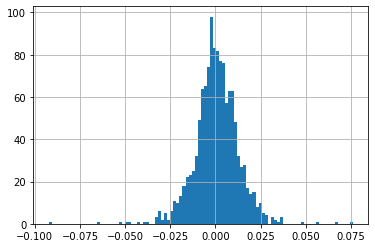

In [9]:
sbux['return'].hist(bins=100)

In [10]:
#Stats; Sample mean & Sample Variance
sbux['return'].mean(), sbux['return'].std() #Std Dev = sqrt(variance)

(0.0006002332205830914, 0.012360934026133882)

In [11]:
#log return
sbux['log_return'] = np.log(sbux['return'] + 1)
sbux.head()


#very similar result, to the last 2 decimals

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


<AxesSubplot:>

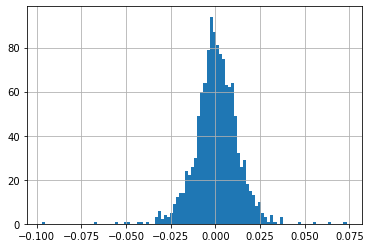

In [12]:
sbux['log_return'].hist(bins=100)

In [13]:
sbux['log_return'].mean(), sbux['log_return'].std() #Std Dev = sqrt(variance)

(0.000523590274810868, 0.012381234216101253)

## Normal Distribution

In [14]:
from scipy.stats import norm

In [15]:
#create list of x coordinates from min to max returns with 100 points in between --> linspace function
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [16]:
#generate normal pdf with sample returns mean and std dev
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale=sbux['return'].std())

<AxesSubplot:>

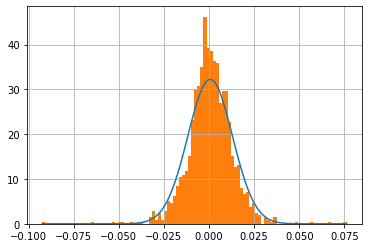

In [17]:
plt.plot(x_list, y_list)
sbux['return'].hist(bins=100, density=True) #--> normalised

#function plot + histogram --> not a good fit, data with higher freq than predicted, gaps, unliquely extreme values

((array([-3.26318411, -3.00291115, -2.85798028, ...,  2.85798028,
          3.00291115,  3.26318411]),
  array([-0.09243697, -0.06519128, -0.05321627, ...,  0.05617538,
          0.06623157,  0.0761332 ])),
 (0.012069021175478525, 0.0006002332205830934, 0.9745536080830226))

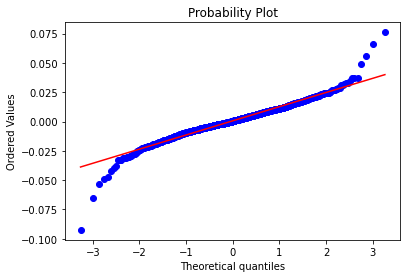

In [18]:
from scipy.stats import probplot

#data with only actual numbers, compare data with normal dist, best parameters to match with data, plt corresponds with earlier matplotlib
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt)

# heavier tails than expected, confirms earlier conclusions

C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


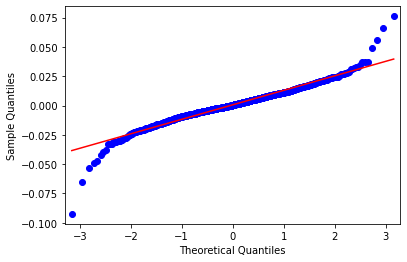

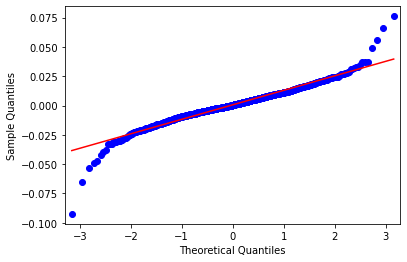

In [19]:
# statsmodels --> much more extensive (Intro)

import statsmodels.api as sm

sm.qqplot(sbux['return'].dropna(), line='s') # --> line standardized

In [20]:
#log returns
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

y_list = norm.pdf(x_list, loc=sbux['log_return'].mean(), scale=sbux['log_return'].std())

<AxesSubplot:>

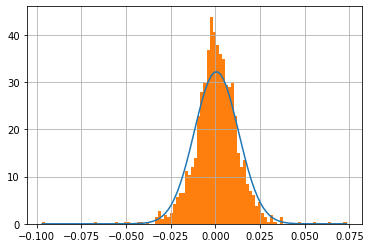

In [21]:
plt.plot(x_list, y_list)
sbux['log_return'].hist(bins=100, density=True)

#--> Exactly same, not much difference in formula

C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


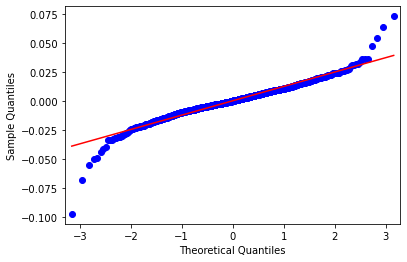

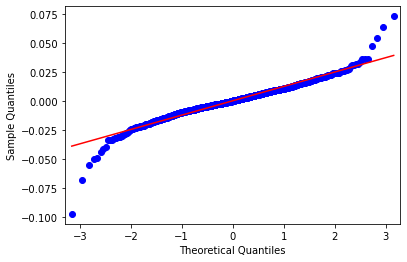

In [22]:
sm.qqplot(sbux['log_return'].dropna(), line='s')

## t-distribution

In [23]:
from scipy.stats import t #careful! --> often short variable name in programming (easy to overwrite 't' with ex:loop index)

In [24]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [25]:
params = t.fit(sbux['return'].dropna()) #get parameters of best fitting t-dist to returns data
params #tuple containing 3 values

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)

In [26]:
df, loc, scale = params # assume degree of freedom, location & scale (if wrong, plot looks bad)

In [27]:
y_list = t.pdf(x_list, df, loc, scale)

<AxesSubplot:>

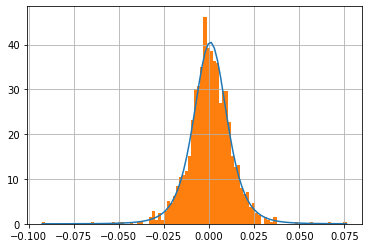

In [28]:
plt.plot(x_list, y_list)
sbux['return'].hist(bins=100, density=True)

#t-dist = much better fit than normal dist because weight has been distributed accross tails and head

In [29]:
# qqplot with statsmodel, t-dist
#sm.qqplot(sbux['return'].dropna(), dist=t, line='s')
#error --> missing argument for df, normal only 2 parameter --> fine

In [30]:
#--> try scipy
#probplot(sbux['return'].dropna(), dist='t', fit=True, plot=plt)
#same error --> give these functions expected arguments --> t-model without df argument

C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


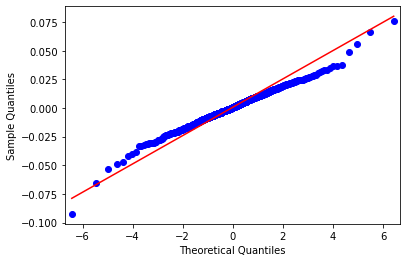

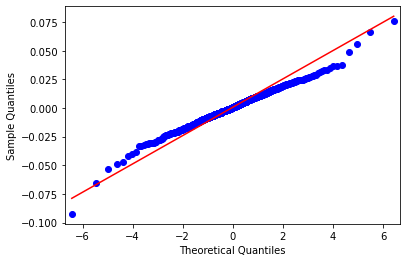

In [31]:
# class creation with constructer taking argument: 
# df --> instance variable to never be passed in when subsequent function call
class myt:
    def __init__(self, df):
        self.df = df
        
    # declare function fit calling t.fit --> necessary to implement as called by qqplot function
    def fit(self, x):
        return t.fit(x)
    
    # ppf function, only allowed to take loc and scale --> internally add df param by passing in self.df
    def ppf(self, x, loc=0, scale=1):
        return t.ppf(x, self.df, loc, scale)
    
    
# qqplot with statsmodel, t-dist
sm.qqplot(sbux['return'].dropna(), dist=myt(df), line='s')

# --> quite a good fit, init?! ;)

In [32]:
# log return
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

In [33]:
params = t.fit(sbux['log_return'].dropna()) #get parameters of best fitting t-dist to returns data
params #tuple containing 3 values

(4.75336721921499, 0.0006969522085244113, 0.009324468516575219)

In [34]:
df, loc, scale = params # assume degree of freedom, location & scale (if wrong, plot looks bad)

In [35]:
y_list = t.pdf(x_list, df, loc, scale)

<AxesSubplot:>

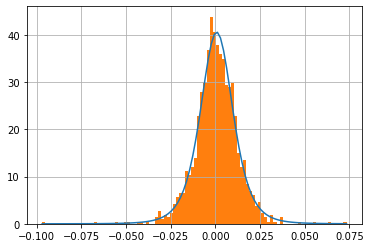

In [36]:
plt.plot(x_list, y_list)
sbux['log_return'].hist(bins=100, density=True)

#t-dist = much better fit than normal dist because weight has been distributed accross tails and head

C:\Users\Emilie Berger\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


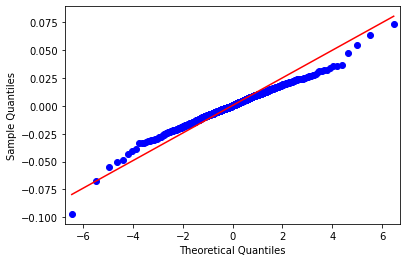

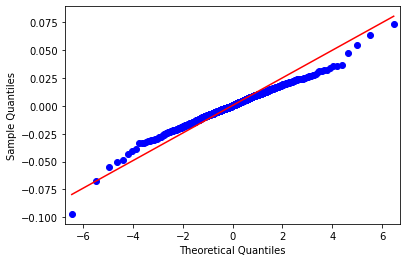

In [37]:
#qqplot with statsmodel, t-dist
sm.qqplot(sbux['log_return'].dropna(), dist=myt(df), line='s')

 #--> quite a good fit, init?! ;)

## Skew & Kurtosis

In [38]:
sbux['return'].skew()

-0.2680784195824153

In [39]:
sbux['return'].kurtosis()

5.593158903424731

In [40]:
sbux['log_return'].skew()

-0.41015501490182066

In [41]:
sbux['log_return'].kurtosis()

5.964502225799283

In [42]:
# sanity check, both values very close to 0
samp = pd.Series(np.random.randn(10000))
samp.skew(), samp.kurtosis()

(0.0057723864012036875, -0.07086258624400665)

## Confidence Intervals

In [43]:
# --> Model Stock Returns

values = sbux['return'].dropna().to_numpy()

m = values.mean()
s = values.std(ddof=1)

# calculate upper/lower limits of CI
low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

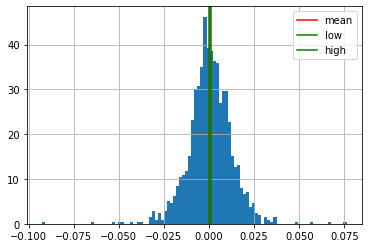

In [44]:
# plot CI on top of return histogram
sbux['return'].hist(bins=100, density=True)
plt.axvline(m, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='green')
plt.legend()

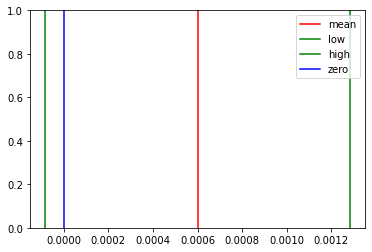

In [45]:
#only vertical lines, with line at 0 No histogram, stats testing
#sbux['return'].hist(bins=100, density=True)
plt.axvline(m, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='green')
plt.axvline(0, label='zero', color='blue')
plt.legend()

## Statistical Tests

In [46]:
# Are the returns significantly greater than 0?
#2 functions testing for normality and return both test stats and p-value
from scipy.stats import jarque_bera, normaltest

In [47]:
#array of sbux returns
jarque_bera(values)

#test stats very large, accordingly p-value really small --> rounded up to 0 --> 
#reject null hypothesis that data comes from normal dist

Jarque_beraResult(statistic=1639.0284386552219, pvalue=0.0)

In [48]:
normaltest(values)

#test stats very large, accordingly p-value really small(3x10^-38)
#reject null hypothesis that data comes from normal dist

NormaltestResult(statistic=172.6819672061636, pvalue=3.1811727900119636e-38)

In [49]:
#log returns
jarque_bera(sbux['log_return'].dropna())

Jarque_beraResult(statistic=1882.1814629047672, pvalue=0.0)

In [50]:
normaltest(sbux['log_return'].dropna())

# again log_returns not normally distributed 

NormaltestResult(statistic=198.54738937007733, pvalue=7.690989175882069e-44)

In [51]:
# Kolmogrov-Smirnov test which can test for any dist
from scipy.stats import kstest

In [52]:
# aware that data isn't normal --> t-distribution
# cdf as argument --> parameter of t-dist
# p-value = 1 - cdf
df, loc, scale = t.fit(values)
def cdf(x):
    return t.cdf(x, df, loc, scale)

In [53]:
kstest(values, cdf)

# small test stats, large p-value --> cannot reject null hypothesis that data comes from t-dist

KstestResult(statistic=0.01887566203844726, pvalue=0.7537785475444063)

In [54]:
#log return
df, loc, scale = t.fit(sbux['log_return'].dropna())
def cdf(x):
    return t.cdf(x, df, loc, scale)

kstest(sbux['log_return'].dropna(), cdf)

# similar result

KstestResult(statistic=0.01837990941957013, pvalue=0.7818301159274575)

In [55]:
# 1-sample t-test
from scipy.stats import ttest_1samp

In [56]:
# check how data compares to some values
# passing in data and mean for null hypothesis --> 0
ttest_1samp(values, 0)

# p-value pretty close to significance threshold (5%) but we still fail to reject null hypothesis

Ttest_1sampResult(statistic=1.7223010261810556, pvalue=0.08526098717694539)

In [57]:
#log return
ttest_1samp(sbux['log_return'].dropna(), 0)

# higher p-value
# 2-sided test
# what the p-value should be for 1-sided test...
# ...p-value divided by 2

Ttest_1sampResult(statistic=1.4999195047533647, pvalue=0.13388636615667793)

In [58]:
ttest_1samp(values, 0)[1]/2
# reject null hypothesis

0.04263049358847269

In [59]:
ttest_1samp(sbux['log_return'].dropna(), 0)[1]/2
# fail to reject null hypothesis

0.06694318307833896

<AxesSubplot:>

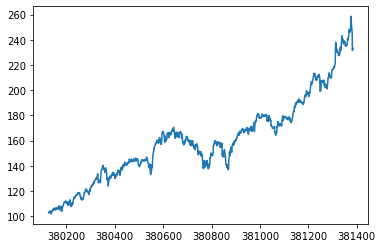

In [60]:
# since test didn't show significance, try another stock

mmm= data[data['Name'] == 'MMM'].copy() #MassMutual
mmm['close'].plot()

# pretty clear trend upward

In [61]:
mmm['prev_close'] = mmm['close'].shift(1)
mmm['return'] = mmm['close']/mmm['prev_close'] - 1
mmm['log_return'] = np.log(mmm['return'] + 1)

In [62]:
mmm['return'].mean(), mmm['return'].std()

#close to 0 bu doesn't not imply --> expected return simply round to 0

(0.0007001182500580143, 0.009768718404053087)

<AxesSubplot:>

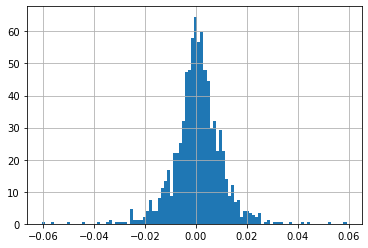

In [63]:
mmm['return'].hist(bins=100, density=True)

In [64]:
m = mmm['return'].mean()
s = mmm['return'].std(ddof=1)

# calculate upper/lower limits of CI
low = m - 1.96 * s / np.sqrt(len(mmm['return']))
high = m + 1.96 * s / np.sqrt(len(mmm['return']))
print(low, high, m, s)

0.00016050724660541572 0.0012397292535106129 0.0007001182500580143 0.009768718404053087


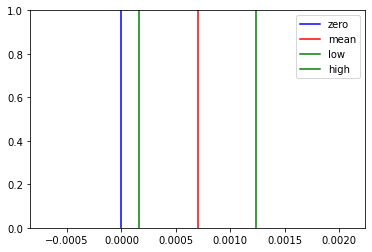

In [65]:
plt.xlim((low - 0.001, high + 0.001))
plt.axvline(0, label='zero', color='blue')
plt.axvline(m, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='green')
plt.legend()

#plot ci along with 0 line, aware that 95% ci represents with respect to 0 line
#z-test, 0 excluded in 95% ci

In [66]:
ttest_1samp(mmm['return'].dropna(), 0)

Ttest_1sampResult(statistic=2.541991701703365, pvalue=0.011141496531324404)

In [67]:
#log return
ttest_1samp(mmm['log_return'].dropna(), 0)

# reject null-hypothesis that returns comes from a dist with true mean 0 as both p-values = 0.01

Ttest_1sampResult(statistic=2.365963115873947, pvalue=0.018134246809755054)

## Covariance & Correlation

In [68]:
close = pd.read_csv(r"C:\Users\Emilie Berger\Downloads\sp500_close.csv", parse_dates=True)
close.head()

,Unnamed: 0,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
1,2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
4,2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


975

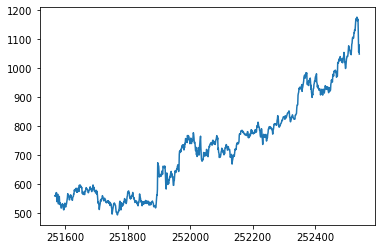

In [69]:
goog = data[data['Name'] == 'GOOG']
goog['close'].plot()
len(goog)

In [70]:
symbols = ['AAPL', 'GOOG', 'IBM', 'NFLX', 'SBUX']
sub = close[symbols].copy()
sub.dropna(axis=0, how='all', inplace=True)
sub.head()

,AAPL,GOOG,IBM,NFLX,SBUX
0,67.8542,NaN,201.68,25.8528,28.185
3,68.5614,NaN,200.16,25.4128,28.070
4,66.8428,NaN,200.04,25.4214,28.130
5,66.7156,NaN,200.09,26.6098,27.915
6,66.6556,NaN,199.65,26.7714,27.775


In [71]:
for symbol in symbols:
    sub[symbol + '_prev'] = sub[symbol].shift(1)
    sub[symbol + '_ret'] = sub[symbol] / sub[symbol + '_prev'] - 1
#sub.head()

In [72]:
rets = sub[[symbol + '_ret' for symbol in symbols]].copy()
rets.head()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
0,NaN,NaN,NaN,NaN,NaN
3,0.010422,NaN,-0.007537,-0.017019,-0.004080
4,-0.025067,NaN,-0.000600,0.000338,0.002138
5,-0.001903,NaN,0.000250,0.046748,-0.007643
6,-0.000899,NaN,-0.002199,0.006073,-0.005015


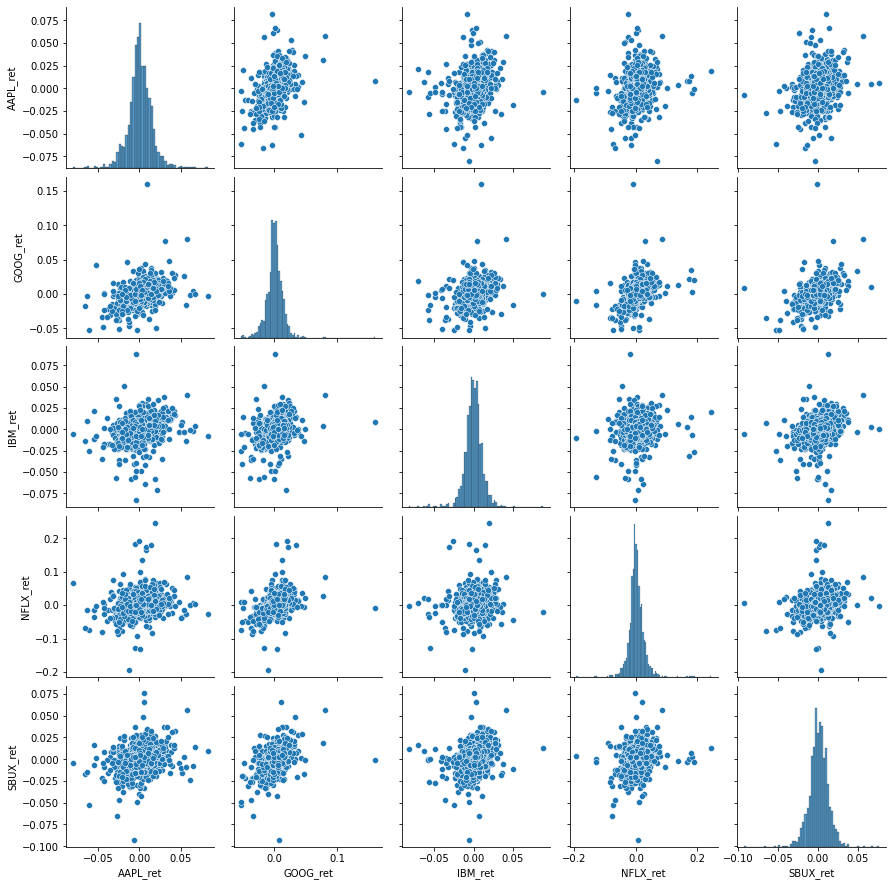

In [73]:
# plot scatter matrix
import seaborn as sns
sns.pairplot(rets)

# --> rows&cols correspond to return for each stock
# diagonals = each return hists
# scatter plots of each return with other returns
# --> Visual representation of covariance or correlation matrix

# decent amount of linear correlation between Apple and Google (2nd graph)
# decent amount of linear correlation between Google and Netflix
# decent amount of linear correlation between Google and Starbucks
# for others not very clear

In [74]:
rets.mean()

AAPL_ret    0.000786
GOOG_ret    0.000745
IBM_ret    -0.000144
NFLX_ret    0.002217
SBUX_ret    0.000600
dtype: float64

In [75]:
rets.std()

AAPL_ret    0.014593
GOOG_ret    0.014069
IBM_ret     0.011876
NFLX_ret    0.027353
SBUX_ret    0.012361
dtype: float64

Text(0.5, 0, 'Return')

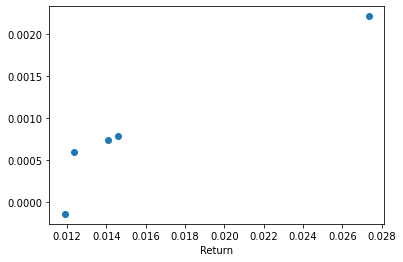

In [76]:
plt.scatter(rets.std(), rets.mean())
plt.xlabel('Volatility') # in finance std = one way to think of volatility
plt.xlabel('Return')

# trends upwards --> volatiliy is higher --> return also higher

In [77]:
rets.corr()

# correlation between Google and Apple pretty high as shown on scatter matrix...
# Google and Starbucks is highest

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,1.000000,0.415487,0.263927,0.227387,0.307716
GOOG_ret,0.415487,1.000000,0.345643,0.404768,0.455936
IBM_ret,0.263927,0.345643,1.000000,0.163267,0.315263
NFLX_ret,0.227387,0.404768,0.163267,1.000000,0.266012
SBUX_ret,0.307716,0.455936,0.315263,0.266012,1.000000


In [78]:
rets.cov()

# tiny values --> correlation matrix slightly more useful as values normalised between -1 and +1

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,0.000213,0.000084,0.000046,0.000091,0.000056
GOOG_ret,0.000084,0.000198,0.000058,0.000151,0.000079
IBM_ret,0.000046,0.000058,0.000141,0.000053,0.000046
NFLX_ret,0.000091,0.000151,0.000053,0.000748,0.000090
SBUX_ret,0.000056,0.000079,0.000046,0.000090,0.000153


## Mixture of Gausians

In [79]:
# create own and test GMM + check kurtosis 
#--> intuition how GMM can achieve heavy tails
# might seem surprising

# 500 data points evenly spaced between - 0.1 and + 0.1 --> x_list

x_list = np.linspace(-0.1, 0.1, 500)

In [80]:
# generate pdf for an arbitrary mixture model
# randomly chosen number --> mixture proportion = 0.5 --> p
p = 0.5

# set fx = p* 1Gaussian pdf + (1-p)* 1different Gaussian pdf
fx = p*norm.pdf(x_list, loc=0, scale=0.01) + (1-p) * norm.pdf(x_list, loc=0, scale=0.002)
# chosen gaussians with same mean but different variances (std = 0.01, 0.002)

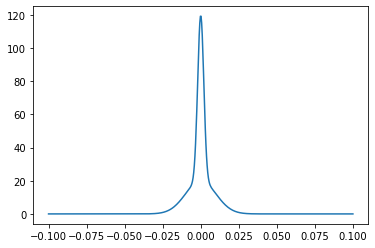

In [81]:
plt.plot(x_list, fx)
# characteristics seen in returns --> very tall head, skinny shoulders.
# Unfortunately, tails = hard to see

In [82]:
#... easily check kurtosis
# generate samples from our model
# --> kurtosis of samples

samples = [] # empty list
m0, s0 = 0, 0.01
m1, s1 = 0, 0.002 # same parameters as above
for _ in range(5000):
    if np.random.random() < p:
        x = norm.rvs(m0, s0) # Gaussian 0 with prob p
    else:
        x = norm.rvs(m1, s1) # Gaussian 1 with prob 1-p
    samples.append(x)
    
    
# samples list conversion --> pandas series --> easily use kurtosis fuction
series = pd.Series(samples)
series.kurtosis() # > 0 --> heavy tails relative to the norml

2.712678592404149

In [83]:
# Use of Gaussian mixture model
# --> fit dist to actual stock return

from sklearn.mixture import GaussianMixture

# Start with Starbucks returns dataset
# drop missing values, convert to numpy array --> 2D reshape (we want something NxD when using sklearn)
data = sbux['log_return'].dropna().to_numpy().reshape(-1, 1)
# instantiate Gaussian mixture object 
# Downside --> choose number of gaussians --> 2 = enough to generate heavy tails
model = GaussianMixture(n_components=2)
model.fit(data) # fit data

# parameters
weights = model.weights_ # mixture components
means = model.means_ # means of each gaussians
cov = model.covariances_ # covariances

print("weights: ", weights)
print("means: ", means)
print("variances: ", cov)

# shapes = kind of strange --> lots of extra dimensions
# sklearn works with lots multidimensional data.
# returns = 1 dimensional
# DATA(x) = N x D, Number of Gaussians = K, means = K x D, Variances = K x D x D
# D = 1, K = 2

weights:  [0.61807517 0.38192483]
means:  [[ 0.00114856]
 [-0.00048781]]
variances:  [[[6.51181870e-05]]

 [[2.96637119e-04]]]


In [84]:
# flatten means of covariances --> 1D array
means = means.flatten()
var = cov.flatten()

In [85]:
# generate data for plot

x_list = np.linspace(data.min(), data.max(), 100) # list of xs from min to max
fx0 = norm.pdf(x_list, means[0], np.sqrt(var[0])) # pdf for 1st Gaussian
fx1 = norm.pdf(x_list, means[1], np.sqrt(var[1])) # pdf for 2nd Gaussian
fx = weights[0] * fx0 + weights[1] * fx1 # pdf for full model by weighing 2gausinas by earlier weights

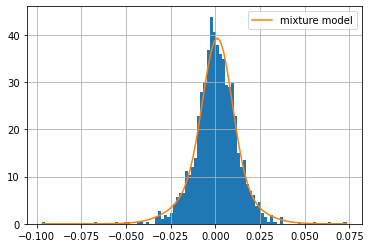

In [86]:
# histograms of return with fitted density
# Gaussian mixture fits better than single gaussian
# captures tall head, skinny shoulders and fat tails

sbux['log_return'].hist(bins=100, density=True)
plt.plot(x_list, fx, label='mixture model')
plt.legend()

## Volatility Clustering

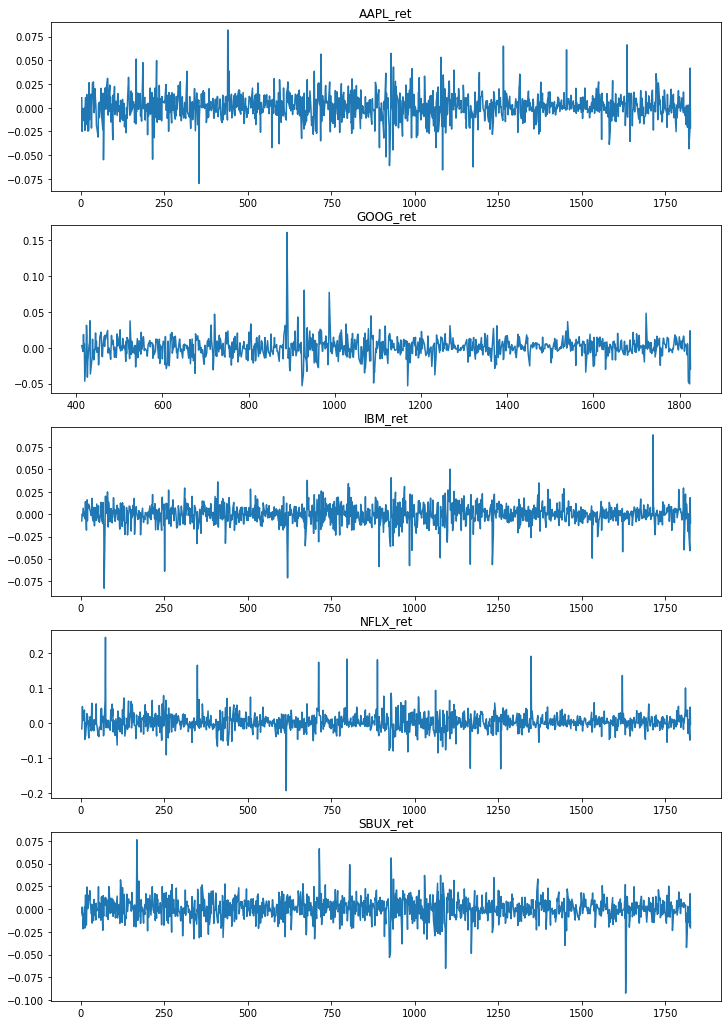

In [87]:
for i, symbol in enumerate(rets.columns):
    plt.subplot(len(rets.columns), 1, i + 1)
    plt.title(symbol)
    rets[symbol].plot(figsize=(12, 18))

## Price Simulation

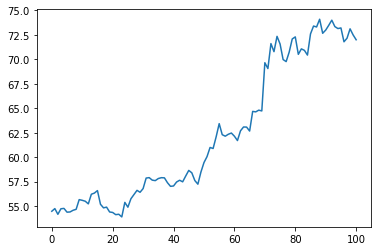

In [88]:
# Ex 1: Sample from our existing returns

p0 = sbux.iloc[-1]['close'] # arbitrary value = last dataset close price
prices = [p0] # list of prices, current only p0
returns = sbux['return'].dropna() # list of returns by taking sbbux return values and dropping missing values
for _ in range(100): # loop, with 100days simulation
    r = np.random.choice(returns) # randomly select return from returns
    p = prices[-1] * (1 + r) # find next prices by taking last prices in prices list * (1+r)
    prices.append(p) # append p to prices list
    
plt.plot(prices)

# does it seem like a reasonable and realistic evolution of the stock price

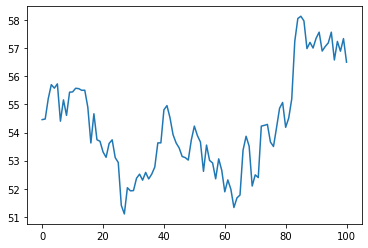

In [89]:
# simulation using fitted t-dist

df, loc, scale = t.fit(sbux['return'].dropna()) # t.fit() --> returns df, loc, scale
p0 = sbux.iloc[-1]['close'] # arbitrary value = last dataset close price
prices = [p0] # list of prices, current only p0
for _ in range(100): # loop, with 100days simulation
    r = t.rvs(df, loc, scale) # sample from t-dist --> return values = sample from t-dist --> simulated stock returns
    p = prices[-1] * (1 + r) # find next prices by taking last prices in prices list * (1+r)
    prices.append(p) # append p to prices list
    
plt.plot(prices)

# does it seem like a reasonable and realistic evolution of the stock price
# not able to tell which plot came from which algo